# KUIS 1 MACHINE LEARNING

Nama: Magfiroh Indah Karisma

NIM: 2141720180

Kelas: TI-3F

## Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

### Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Tentang Dataset MNIST
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#### 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban Anda dan buktikan!

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


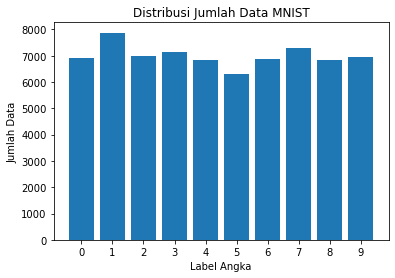

Terdapat data imbalance dalam dataset MNIST


In [3]:
# Memuat dataset MNIST
mnist = fetch_openml('mnist_784')

# Memisahkan fitur dan label
X = mnist.data
y = mnist.target.astype(np.uint8)

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y)

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

# Menampilkan grafik distribusi jumlah data
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Distribusi Jumlah Data MNIST')
plt.show()

# Menentukan apakah ada data imbalance
max_count = max(label_counts)
min_count = min(label_counts)
imbalance_threshold = 0.1  # Ambang batas untuk menentukan data imbalance

if (max_count / min_count) > (1 + imbalance_threshold):
    print("Terdapat data imbalance dalam dataset MNIST")
else:
    print("Tidak terdapat data imbalance dalam dataset MNIST")

#### 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.

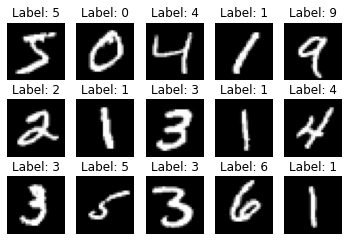

In [5]:
images = mnist.data  # Mengambil fitur (citra) dari dataset MNIST
labels = mnist.target.astype(int)  # Mengambil label dan mengonversinya menjadi tipe data int

num_images_to_display = 15  # Jumlah citra yang ingin ditampilkan
for i in range(num_images_to_display):
    plt.subplot(3, 5, i + 1)  # Membuat subplot dengan 3 baris, 5 kolom, dan nomor subplot yang berubah dari 1 hingga 15
    image = images.iloc[i].values.reshape(28, 28)  # Mengambil citra ke-i, mengonversi menjadi array, dan mengubah bentuknya menjadi 28x28 piksel
    plt.imshow(image, cmap='gray')  # Menampilkan citra dalam skala abu-abu
    plt.title(f"Label: {labels[i]}")  # Menambahkan judul dengan label yang sesuai
    plt.axis('off')  # Menghilangkan tampilan sumbu pada setiap subplot

plt.show()  # Menampilkan semua subplot dalam satu jendela

#### 3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

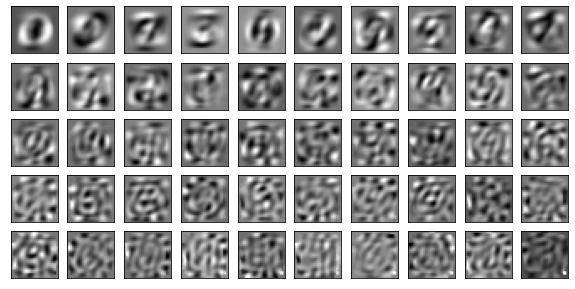

In [6]:
from sklearn.decomposition import PCA

# Mengambil fitur (citra) dan label dari dataset MNIST
X = mnist.data.astype('float64')
y = mnist.target

# Normalisasi data: menghitung rata-rata dan standar deviasi, lalu mengubah data menjadi z-score
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 1e-8)

n_components = 50 # Jumlah komponen utama yang ingin dihasilkan
pca = PCA(n_components=n_components) # Membuat objek PCA dengan jumlah komponen utama yang ditentukan
X_pca = pca.fit_transform(X) # Melakukan PCA pada data dan menghasilkan data yang telah direduksi dimensinya

fig, axes = plt.subplots(5, 10, figsize=(10, 5)) # Membuat tata letak untuk menampilkan komponen utama
for i, ax in enumerate(axes.ravel()): # Iterasi melalui komponen utama yang dihasilkan
    # Menampilkan komponen utama sebagai citra 28x28 piksel dalam skala abu-abu
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#### 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [7]:
X = mnist.data.astype('float64')  # Mengambil fitur (citra) dari dataset MNIST dan mengonversinya menjadi tipe data float64
y = mnist.target  # Mengambil label dari dataset MNIST

from sklearn.model_selection import train_test_split  # Mengimpor fungsi train_test_split dari scikit-learn

# Pembagian dataset menjadi train dan test dengan test_size=0.3 (70% train, 30% test) dan random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pembagian dataset menjadi train dan test dengan test_size=0.2 (80% train, 20% test) dan random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pembagian dataset menjadi train dan test dengan test_size=0.1 (90% train, 10% test) dan random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


#### 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [8]:
# impor modul dan klasifikasi
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
scaler = StandardScaler() # Inisialisasi Penskalaan

# Penskalaan Data Pelatihan
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1.0) # Inisialisasi Model SVM
svm.fit(X_train, y_train) # Pelatihan Model SVM

# Prediksi pada Data Pelatihan dan Pengujian
train_preds_svm = svm.predict(X_train)
test_preds_svm = svm.predict(X_test)

nb = GaussianNB() # Inisialisasi Model Naive Bayes
nb.fit(X_train, y_train) # Pelatihan Model Naive Bayes

# Prediksi pada Data Pelatihan dan Pengujian
train_preds_nb = nb.predict(X_train)
test_preds_nb = nb.predict(X_test)

#### 6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [12]:
# Pengimporan Modul dan Fungsi
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Perhitungan Akurasi
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

# Laporan Klasifikasi
train_report_svm = classification_report(y_train, train_preds_svm)
test_report_svm = classification_report(y_test, test_preds_svm)

# Mencetak Hasil Evaluasi
print("Train Accuracy ", train_accuracy_svm)
print("Test Accuracy ", test_accuracy_svm)
print("Train Classification Report ")
print(train_report_svm)
print("Test Classification Report")
print(test_report_svm)

Train Accuracy  0.9902222222222222
Test Accuracy  0.975
Train Classification Report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6220
           1       0.99      1.00      0.99      7077
           2       0.99      0.99      0.99      6316
           3       0.99      0.99      0.99      6381
           4       0.99      0.99      0.99      6213
           5       0.99      0.99      0.99      5655
           6       0.99      1.00      0.99      6199
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6132
           9       0.99      0.98      0.98      6238

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0

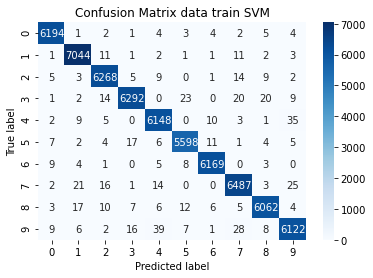

[[6194    1    2    1    4    3    4    2    5    4]
 [   1 7044   11    1    2    1    1   11    2    3]
 [   5    3 6268    5    9    0    1   14    9    2]
 [   1    2   14 6292    0   23    0   20   20    9]
 [   2    9    5    0 6148    0   10    3    1   35]
 [   7    2    4   17    6 5598   11    1    4    5]
 [   9    4    1    0    5    8 6169    0    3    0]
 [   2   21   16    1   14    0    0 6487    3   25]
 [   3   17   10    7    6   12    6    5 6062    4]
 [   9    6    2   16   39    7    1   28    8 6122]]


In [16]:
# Perhitungan Matriks Konfusi Untuk Data Train SVM
train_confusion_matrix_svm = confusion_matrix(y_train, train_preds_svm)

# Mengatur Ukuran Plot dan Membuat Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))

# Penambahan Label dan Judul
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train SVM')

plt.show() # Menampilkan plot

print(train_confusion_matrix_svm) # Mencetak Matriks Konfusi

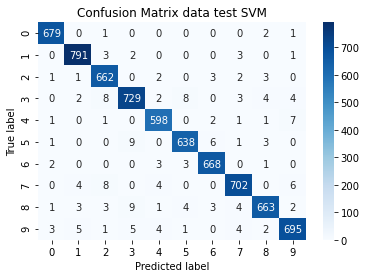

[[679   0   1   0   0   0   0   0   2   1]
 [  0 791   3   2   0   0   0   3   0   1]
 [  1   1 662   0   2   0   3   2   3   0]
 [  0   2   8 729   2   8   0   3   4   4]
 [  1   0   1   0 598   0   2   1   1   7]
 [  1   0   0   9   0 638   6   1   3   0]
 [  2   0   0   0   3   3 668   0   1   0]
 [  0   4   8   0   4   0   0 702   0   6]
 [  1   3   3   9   1   4   3   4 663   2]
 [  3   5   1   5   4   1   0   4   2 695]]


In [17]:
# Perhitungan Matriks Konfusi Untuk Data Test SVM
test_confusion_matrix_svm = confusion_matrix(y_test, test_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test SVM')

plt.show()

print(test_confusion_matrix_svm)

In [19]:
# Perhitungan Akurasi
train_accuracy_nb = accuracy_score(y_train, train_preds_nb)
test_accuracy_nb = accuracy_score(y_test, test_preds_nb)

# Laporan Klasifikasi
train_report_nb = classification_report(y_train, train_preds_nb)
test_report_nb = classification_report(y_test, test_preds_nb)

# Mencetak Hasil Evaluasi
print("Train Accuracy ", train_accuracy_nb)
print("Test Accuracy ", test_accuracy_nb)
print("Train Classification Report ")
print(train_report_nb)
print("Test Classification Report")
print(test_report_nb)

Train Accuracy  0.5604761904761905
Test Accuracy  0.5634285714285714
Train Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      6220
           1       0.81      0.94      0.87      7077
           2       0.88      0.31      0.46      6316
           3       0.75      0.36      0.49      6381
           4       0.84      0.14      0.24      6213
           5       0.60      0.05      0.09      5655
           6       0.62      0.95      0.75      6199
           7       0.90      0.30      0.45      6569
           8       0.29      0.64      0.40      6132
           9       0.38      0.95      0.54      6238

    accuracy                           0.56     63000
   macro avg       0.68      0.55      0.51     63000
weighted avg       0.69      0.56      0.52     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       683
       

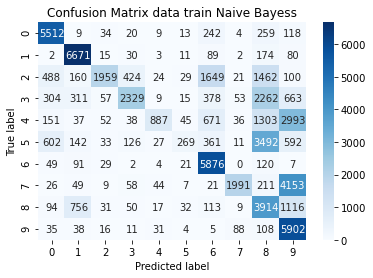

[[5512    9   34   20    9   13  242    4  259  118]
 [   2 6671   15   30    3   11   89    2  174   80]
 [ 488  160 1959  424   24   29 1649   21 1462  100]
 [ 304  311   57 2329    9   15  378   53 2262  663]
 [ 151   37   52   38  887   45  671   36 1303 2993]
 [ 602  142   33  126   27  269  361   11 3492  592]
 [  49   91   29    2    4   21 5876    0  120    7]
 [  26   49    9   58   44    7   21 1991  211 4153]
 [  94  756   31   50   17   32  113    9 3914 1116]
 [  35   38   16   11   31    4    5   88  108 5902]]


In [20]:
# Perhitungan Matriks Konfusi Untuk Data Train NB
train_confusion_matrix_nb = confusion_matrix(y_train, train_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train Naive Bayess')
plt.show()
print(train_confusion_matrix_nb)

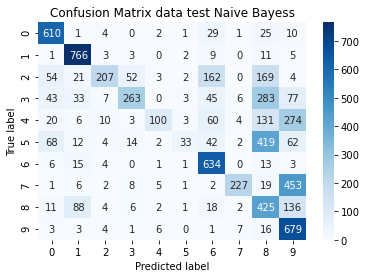

[[610   1   4   0   2   1  29   1  25  10]
 [  1 766   3   3   0   2   9   0  11   5]
 [ 54  21 207  52   3   2 162   0 169   4]
 [ 43  33   7 263   0   3  45   6 283  77]
 [ 20   6  10   3 100   3  60   4 131 274]
 [ 68  12   4  14   2  33  42   2 419  62]
 [  6  15   4   0   1   1 634   0  13   3]
 [  1   6   2   8   5   1   2 227  19 453]
 [ 11  88   4   6   2   1  18   2 425 136]
 [  3   3   4   1   6   0   1   7  16 679]]


In [21]:
# Perhitungan Matriks Konfusi Untuk Data Test NB
test_confusion_matrix_nb = confusion_matrix(y_test, test_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test Naive Bayess')
plt.show()
print(test_confusion_matrix_nb)

#### 7. Tampilkan citra data testing berserta hasil pelabelannya.

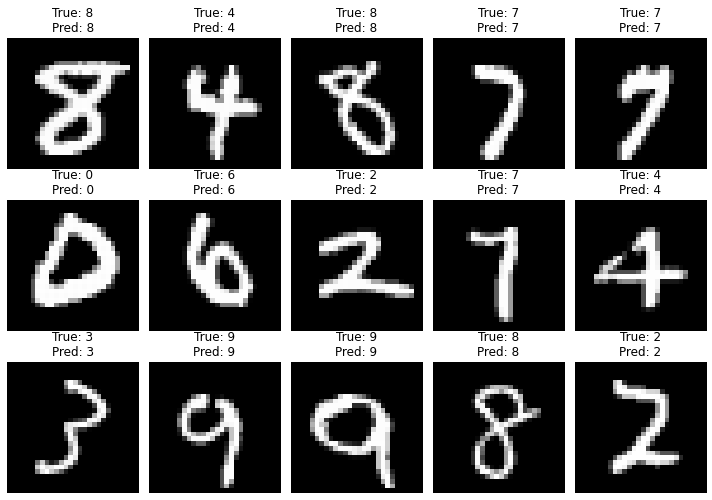

In [23]:
def show_images_with_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)

    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test.iloc[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.tight_layout()
    
show_images_with_predictions(svm, X_test, y_test)

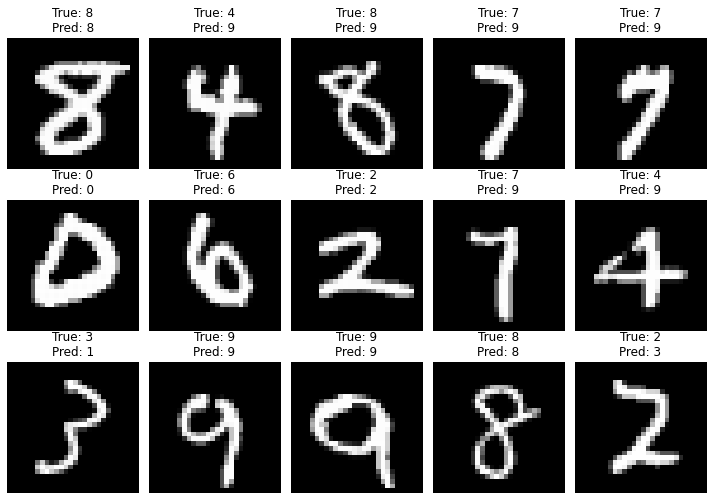

In [24]:
# Naive Bayes
show_images_with_predictions(nb, X_test, y_test)

#### 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [25]:
svm_accuracy = accuracy_score(y_test, test_preds_svm)
nb_accuracy = accuracy_score(y_test, test_preds_nb)

print(f'Akurasi SVM: {svm_accuracy * 100:.2f}%')
print(f'Akurasi NB: {nb_accuracy * 100:.2f}%')

Akurasi SVM: 97.50%
Akurasi NB: 56.34%
